In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#from scipy.interpolate import spline
# jupyter nbconvert xxx.ipynb --no-input

In [2]:
r = [0.7, 0.8, 0.9, 0.92, 0.94, 0.96, 0.98,1.0]
Ts = 0.0001

In [3]:
act_lyf = []; def_lyf = []

for i  in [70, 80, 90, 92, 94, 96, 98, 100]:
    act_lyf_ = pd.read_csv('dataDt1s5/R0'+str(i)+'act_with_lyfTs00001.csv', names=['x','y','lyf'])
    def_lyf_ = pd.read_csv('dataDt1s5/R0'+str(i)+'def_with_lyfTs00001.csv', names=['x','y','lyf'])
    act_lyf.append(act_lyf_)
    def_lyf.append(def_lyf_)

In [4]:
act_m = []; def_m = []
act_d = []; def_d = []

for i in range(8):
    act_ = Ts*act_lyf[i]['lyf']
    def_ = Ts*def_lyf[i]['lyf']
    act_m.append(act_.mean())
    act_d.append(act_.std()) # std deviation
    #act_d.append( np.std(act_) / np.sqrt(np.size(act_)) ) # std error of mean
    def_m.append(def_.mean())
    def_d.append(def_.std())

In [5]:
#np.std(act_) / np.sqrt(np.size(act_))

$active\ motor\ lifetime\ for\ R = [0.7, 0.8, 0.9, 0.92, 0.94, 0.96, 0.98,1.0] $

In [6]:
np.array(act_m)

array([0.01116922, 0.01090401, 0.00881152, 0.00602428, 0.00402577,
       0.00319519, 0.00263988, 0.00232052])

In [7]:
act_m_ = pd.read_csv('dataDt1s5/act_m_R010act_with_lyfkd0.csv', names =['l'])
act_d_ = pd.read_csv('dataDt1s5/act_d_R010act_with_lyfkd0.csv', names = ['l'])
r_ = [0.7, 0.8, 0.9, 0.92, 0.94, 0.96, 1.00]

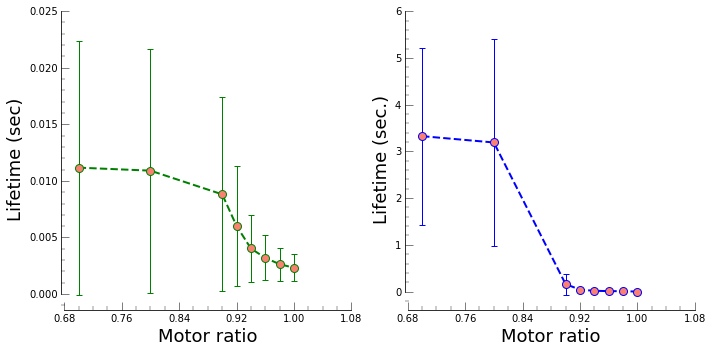

In [8]:
fig, ax = plt.subplots(1,2, figsize=(10,5))

#================================================================================

ax[0].errorbar(r,act_m,act_d, capsize=3, linestyle='--', linewidth=2, elinewidth=1, color='green', marker='o', markersize=8, markerfacecolor='salmon', ecolor='green', label='Load-dependent')

ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)

ax[0].spines['bottom'].set_position(('axes',-0.01))
ax[0].spines['left'].set_position(('axes',-0.01))
ax[0].spines['left'].set_bounds(0,0.025)

ax[0].xaxis.set_ticks_position('bottom')
ax[0].yaxis.set_ticks_position('left')

ax[0].set_xticks(np.arange(0.68,1.1,step=0.08))
ax[0].set_yticks(np.arange(0,0.0251,0.005))

ax[0].minorticks_on()
ax[0].tick_params('both',direction='in',top=False,right=False,length=8, width=0.5,which='major')
ax[0].tick_params('both',direction='in',top=False,right=False,length=4, width=0.4,which='minor')

ax[0].set_xlabel('Motor ratio', fontsize=18)
ax[0].set_ylabel('Lifetime (sec)', fontsize=18)

#for x,y in zip(r,def_m):
#    label = "{:.4f}".format(y)
#    ax.annotate(label,(x,y),textcoords="offset points",xytext=(0.5,10),ha='left', color='blue')
    #https://queirozf.com/entries/add-labels-and-text-to-matplotlib-plots-annotation-examples

#===============================================================================

ax[1].errorbar(r,def_m,def_d, capsize=3, linestyle='--', linewidth=2, elinewidth=1, color='blue', marker='o', markersize=8, markerfacecolor='salmon', ecolor='blue', label='Active')
#ax[1].fill_between(r,(ac_def['spec2']-ac_def['dev2']),(ac_def['spec2']+ac_def['dev2']), alpha=0.4, edgecolor='blue', facecolor='#FF9848')
#ax.plot(r,dfw1, marker='o', markerfacecolor='salmon', ls='--', color='gray', label='Def. F/k')
#ax[1].plot(r,dfw2, marker='o', markerfacecolor='salmon', ls='--', color='brown', label='Def. W')

ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)

ax[1].spines['bottom'].set_position(('axes',-0.01))
ax[1].spines['left'].set_position(('axes',-0.01))
ax[1].spines['left'].set_bounds(0,6)

ax[1].xaxis.set_ticks_position('bottom')
ax[1].yaxis.set_ticks_position('left')

ax[1].set_xticks(np.arange(0.68,1.1,step=0.08))
ax[1].set_yticks(np.arange(0,7,1))
#ax.set_ylim(ymin=0)

#ax[1].tick_params(labelsize=18, direction='out', length=6, width=1) # colors='r', grid_color='r', grid_alpha=0.5
ax[1].minorticks_on()
ax[1].tick_params('both',direction='in',top=False,right=False,length=8, width=0.5,which='major')
ax[1].tick_params('both',direction='in',top=False,right=False,length=4, width=0.4,which='minor')

ax[1].set_xlabel('Motor ratio', fontsize=18)
ax[1].set_ylabel('Lifetime (sec.)', fontsize=18)
#ax[1].set_ylabel('Mean lifetime', fontsize=14)
#ax[1].legend(loc='best')

#fig.text(0.5,-0.05,'Motor ratio', ha='center', fontsize= 16)

fig.tight_layout()
#plt.savefig('fig/v11aBindingMotorRatio.svg', fmt='svg', dip='1200', bbox_inches='tight')
#plt.savefig('fig/v11aBindingMotorRatio.png', fmt='png', dip='1500', bbox_inches='tight')

#plt.savefig('fig/compareLife_R01_09s5dt02.png', format='png', dpi=500, bbox_inches='tight')
#plt.savefig('fig/compareLife_R01_09s5dt02.pdf', format='pdf', dpi=500, bbox_inches='tight')
plt.show()

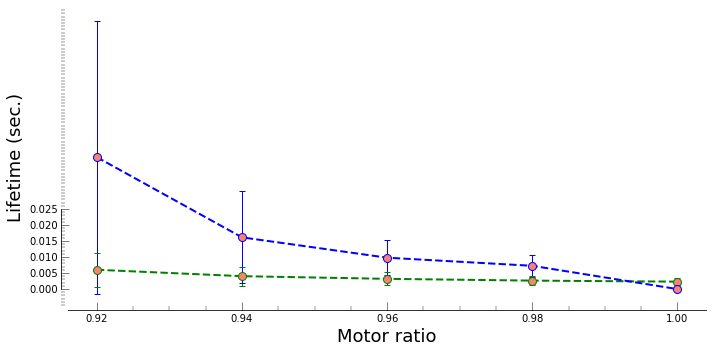

In [20]:
fig, ax = plt.subplots(1,1, figsize=(10,5))

#================================================================================

ax.errorbar(r[-5:],act_m[-5:],act_d[-5:], capsize=3, linestyle='--', linewidth=2, elinewidth=1, color='green', marker='o', markersize=8, markerfacecolor='salmon', ecolor='green', label='Load-dependent')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.spines['bottom'].set_position(('axes',-0.01))
ax.spines['left'].set_position(('axes',-0.01))
ax.spines['left'].set_bounds(0,0.025)

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax.set_xticks(np.arange(0.68,1.1,step=0.02))
ax.set_yticks(np.arange(0,0.0251,0.005))

ax.minorticks_on()
ax.tick_params('both',direction='in',top=False,right=False,length=8, width=0.5,which='major')
ax.tick_params('both',direction='in',top=False,right=False,length=4, width=0.4,which='minor')

ax.set_xlabel('Motor ratio', fontsize=18)
ax.set_ylabel('Lifetime (sec)', fontsize=18)

#for x,y in zip(r,def_m):
#    label = "{:.4f}".format(y)
#    ax.annotate(label,(x,y),textcoords="offset points",xytext=(0.5,10),ha='left', color='blue')
    #https://queirozf.com/entries/add-labels-and-text-to-matplotlib-plots-annotation-examples

#===============================================================================

ax.errorbar(r[-5:],def_m[-5:],def_d[-5:], capsize=3, linestyle='--', linewidth=2, elinewidth=1, color='blue', marker='o', markersize=8, markerfacecolor='salmon', ecolor='blue', label='Active')
#ax[1].fill_between(r,(ac_def['spec2']-ac_def['dev2']),(ac_def['spec2']+ac_def['dev2']), alpha=0.4, edgecolor='blue', facecolor='#FF9848')
#ax.plot(r,dfw1, marker='o', markerfacecolor='salmon', ls='--', color='gray', label='Def. F/k')
#ax[1].plot(r,dfw2, marker='o', markerfacecolor='salmon', ls='--', color='brown', label='Def. W')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.spines['bottom'].set_position(('axes',-0.01))
ax.spines['left'].set_position(('axes',-0.01))
#ax.spines['left'].set_bounds(0,6)

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

#ax.set_xticks(np.arange(0.68,1.1,step=0.08))
#ax.set_yticks(np.arange(0,7,1))
#ax.set_ylim(ymin=0)

#ax[1].tick_params(labelsize=18, direction='out', length=6, width=1) # colors='r', grid_color='r', grid_alpha=0.5
ax.minorticks_on()
ax.tick_params('both',direction='in',top=False,right=False,length=8, width=0.5,which='major')
ax.tick_params('both',direction='in',top=False,right=False,length=4, width=0.4,which='minor')

ax.set_xlabel('Motor ratio', fontsize=18)
ax.set_ylabel('Lifetime (sec.)', fontsize=18)
#ax[1].set_ylabel('Mean lifetime', fontsize=14)
#ax[1].legend(loc='best')

#fig.text(0.5,-0.05,'Motor ratio', ha='center', fontsize= 16)

fig.tight_layout()
#plt.savefig('fig/v11aBindingMotorRatio.svg', fmt='svg', dip='1200', bbox_inches='tight')
#plt.savefig('fig/v11aBindingMotorRatio.png', fmt='png', dip='1500', bbox_inches='tight')

#plt.savefig('fig/compareLife_R01_09s5dt02.png', format='png', dpi=500, bbox_inches='tight')
#plt.savefig('fig/compareLife_R01_09s5dt02X.pdf', format='pdf', dpi=500, bbox_inches='tight')
plt.show()

In [15]:
r[-6:]

[0.9, 0.92, 0.94, 0.96, 0.98, 1.0]

In [9]:
def_d

[1.8939418683408697,
 2.2168489112617675,
 0.22374697146974823,
 0.04256523381348272,
 0.01439230354607015,
 0.005428788322835322,
 0.0033462658471121497,
 nan]

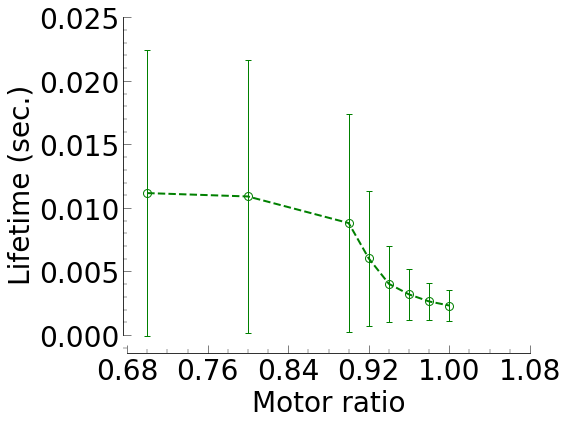

In [20]:
fig, ax = plt.subplots(1,1, figsize=(8,6))

'''
ax[0].errorbar(r,act_m,act_d, capsize=3, linestyle='--', linewidth=2, elinewidth=1, color='green', marker='o', markersize=8, markerfacecolor='none', ecolor='green', label='Active')
ax[0].errorbar(r,def_m,def_d, capsize=3, linestyle='--', linewidth=2, elinewidth=1, color='blue', marker='o', markersize=8, markerfacecolor='none', ecolor='blue', label='Defective')
#ax[1].fill_between(r,(ac_def['spec2']-ac_def['dev2']),(ac_def['spec2']+ac_def['dev2']), alpha=0.4, edgecolor='blue', facecolor='#FF9848')
#ax.plot(r,dfw1, marker='o', markerfacecolor='salmon', ls='--', color='gray', label='Def. F/k')
#ax[1].plot(r,dfw2, marker='o', markerfacecolor='salmon', ls='--', color='brown', label='Def. W')

ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)

ax[0].spines['bottom'].set_position(('axes',-0.01))
ax[0].spines['left'].set_position(('axes',-0.01))
ax[0].spines['left'].set_bounds(0,6)

ax[0].xaxis.set_ticks_position('bottom')
ax[0].yaxis.set_ticks_position('left')

ax[0].set_xticks(np.arange(0.68,1.1,step=0.08))
ax[0].set_yticks(np.arange(0,7,1))
#ax.set_ylim(ymin=0)

#ax[1].tick_params(labelsize=18, direction='out', length=6, width=1) # colors='r', grid_color='r', grid_alpha=0.5
ax[0].minorticks_on()
ax[0].tick_params('both',direction='in',top=False,right=False,length=8, width=0.5,which='major')
ax[0].tick_params('both',direction='in',top=False,right=False,length=4, width=0.4,which='minor')

#ax[1].set_xlabel('Motor ratio')  # , fontsize=18
ax[0].set_ylabel('Mean lifetime', fontsize=14)
ax[0].legend(loc='best')

#for x,y in zip(r,def_m):
#    label = "{:.4f}".format(y)
#    ax.annotate(label,(x,y),textcoords="offset points",xytext=(0.5,10),ha='left', color='blue')
    #https://queirozf.com/entries/add-labels-and-text-to-matplotlib-plots-annotation-examples
'''    
#================================================================================

ax.errorbar(r,act_m,act_d, capsize=3, linestyle='--', linewidth=2, elinewidth=1, color='green', marker='o', markersize=8, markerfacecolor='none', ecolor='green', label='Load-dependent')

#ax.errorbar(r_,act_m_['l'],act_d_['l'], capsize=3, linestyle='--', linewidth=2, elinewidth=1, color='magenta', marker='o', markersize=8, markerfacecolor='none', ecolor='green', label='Non-load-dependent')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.spines['bottom'].set_position(('axes',-0.01))
ax.spines['left'].set_position(('axes',-0.01))
ax.spines['left'].set_bounds(0,0.025)

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax.set_xticks(np.arange(0.68,1.1,step=0.08))
ax.set_yticks(np.arange(0,0.0251,0.005))

ax.minorticks_on()
ax.tick_params('both',direction='in',top=False,right=False,length=8, width=0.5,which='major', labelsize=28)
ax.tick_params('both',direction='in',top=False,right=False,length=4, width=0.4,which='minor', labelsize=28)

#for x,y in zip(r,def_m):
#    label = "{:.4f}".format(y)
#    ax.annotate(label,(x,y),textcoords="offset points",xytext=(0.5,10),ha='left', color='blue')
    #https://queirozf.com/entries/add-labels-and-text-to-matplotlib-plots-annotation-examples

#===============================================================================

ax.set_xlabel('Motor ratio', fontsize=28)
ax.set_ylabel('Lifetime (sec.)', fontsize=28)
#fig.text(0.5,-0.05,'Motor ratio', ha='center', fontsize= 18)

fig.tight_layout()
#plt.savefig('fig/v11aBindingMotorRatio.svg', fmt='svg', dip='1200', bbox_inches='tight')
#plt.savefig('fig/v11aBindingMotorRatio.png', fmt='png', dip='1500', bbox_inches='tight')

#plt.savefig('fig/compareLife_R01_09s5dt02.png', format='png', dpi=500, bbox_inches='tight')
#plt.savefig('fig/compareLife_R01_09s5dt02.svg', format='svg', dpi=500, bbox_inches='tight')
plt.show()

$r = \frac{T_{on}}{T_{total}}$

$T_{total} = \frac{1}{k_a}$

$r = T_{on}\times k_a$

In [17]:
40*np.array(act_m) # not correct. KATPase is not the same as ka in the simulation

array([0.44676861, 0.43616038, 0.35246079, 0.24097134, 0.16103081,
       0.12780757, 0.10559524, 0.09282096])

In [20]:
!jupyter nbconvert lifetime_RTs00001.ipynb --no-input --to html

[NbConvertApp] Converting notebook lifetime_R.ipynb to html
[NbConvertApp] Writing 592866 bytes to lifetime_R.html
